In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from PIL import Image

import hopfield
import utilities as uti
# import learning_rules as lrn
# import activation_functions as afn
# from datasets import Dataset_demoletters, Dataset_MNIST, Dataset_Demyan

In [2]:
from tqdm import tqdm

hop_net = hopfield.HopfieldNetwork()

# ~5m for 300
net_size = 64
img_N = 5

step_size = 20
thresholds = np.linspace(-3,3,step_size)
gradients = np.exp(np.linspace(-5, 5, step_size))

DATA = [[] for x in gradients]
for i, grad in enumerate(tqdm(gradients)):
    for thresh in thresholds:
        params = (grad, thresh)
        white_noise_dataset = np.random.randint(0, 2, size=(img_N, net_size), dtype='int') * 2 - 1
        DATA[i].append(hop_net.run(white_noise_dataset, 
                                    iterations=1000,
                                    params=params,
                                    lr="hebbian", af="sync_tanh",
                                    noise_level=.0,
                                    print_info=False))


100%|██████████| 20/20 [00:10<00:00,  1.86it/s]


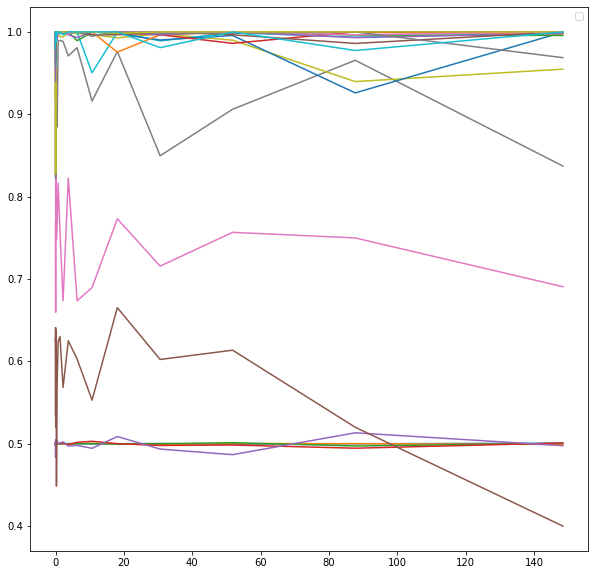

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))

for i, grad in enumerate(gradients):
    errors = []
    for j, thresh in enumerate(thresholds):
        pm = DATA[i][j]
        error = 1 - np.mean(np.array(pm.error))
        errors.append(error)

    # I DONT KNOW WTF IM DOING HELP
    axs.plot(gradients, errors)
plt.legend()
